## Udemy Courses Analysis

### 1. Business Understanding

#### 1.1 *Problem Statement:* The online learning industry is growing rapidly, and Udemy, as a major player, offers a variety of courses across multiple subjects. The challenge is to understand what factors influence the popularity and success of Udemy courses to guide decisions for course creators and platform management.

#### 1.2 *Project Goal:* The goal of this analysis is to provide insights into what makes a course successful on Udemy. This includes understanding which courses attract the most subscribers, how course pricing affects popularity, and which topics are most in-demand. The analysis will also aim to identify trends in course content and performance based on various factors.

#### 1.3 *Stakeholders:*
- Udemy Platform Managers: To optimize the course offering strategy and promote high-demand content.

- Course Creators: To design and price their courses more effectively based on what works well on the platform.

- Marketing Teams: To focus on promoting courses with higher success potential.

- Data Analysts: To derive actionable insights from the data.

#### 1.4 *Key Metrics:*

- Number of Subscribers: A higher number indicates more popular courses.

- Number of Reviews: Represents course engagement and satisfaction.

- Price: Impact of pricing on course enrollment.

- Course Level: To assess if beginners, intermediate, or advanced levels attract more students.

- Subject: Popularity trends across different subject categories.

#### 1.5 Features of the Dataset

- course_id: Unique identifier for each course.

- course_title: The title of the course.

- url: Link to the course on Udemy.

- is_paid: Whether the course is free or paid.

- price: Price of the course (applicable only if it’s a paid course).

- num_subscribers: Number of students enrolled in the course.

- num_reviews: Number of reviews the course received.

- num_lectures: Total number of lectures included in the course.

- level: Course difficulty level (e.g., Beginner, Intermediate, Advanced).

- content_duration: Total length of course content in hours.

- published_timestamp: Date when the course was first published.

- subject: The topic category of the course.

#### 1.6 Null and Alternative Hypothesis

- Null Hypothesis (H0): There is no significant relationship between the price of a course and the number of subscribers it attracts.

- Alternative Hypothesis (H1): There is a significant relationship between the price of a course and the number of subscribers it attracts.

#### 1.7 10 Business Analytical Questions

1. What is the average number of subscribers for free versus paid courses?

2. Does a higher price correlate with more course reviews or better engagement?

3. Which subject areas attract the most subscribers?

4. How does the level of a course (beginner, intermediate, advanced) impact the number of subscribers?

5. Is there a trend in the number of courses published over time?

6. What is the average content duration for courses in each subject?

7. Are courses with more lectures more successful (i.e., more subscribers)?

8. What is the distribution of course prices across different subjects?

9. How do the number of reviews impact course enrollment (subscribers)?

10. Do courses published earlier perform better than recently published courses?


### 2. Data Understanding

#### 2.1 Importing relevant Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import warnings

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical Analysis and Hypothesis Testing
from scipy import stats
import pingouin as pg
import statsmodels.api as sm
import openpyxl

#### 2.2 Loading Dataset

In [2]:
# File path for the dataset for analysis
file_path = 'C:/Users/HP/AzubiCA/Personal Projects/udemy_courses-1/data/udemy_courses_dataset.xlsx'

# Load the file into the notebook
udemy_data = pd.read_excel(file_path)
udemy_data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


#### 2.3 Expolatory Data Analysis (E.D.A.)

##### 2.3.1 Data Quality Assessment & Exploring Data

In [3]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [4]:
# Exclude course_id, course_title, and url  (assuming no spaces in column names)
exclude_fields = ['course_id', 'course_title', 'url']
desired_fields = [col for col in udemy_data.columns if col not in exclude_fields]

# Iterate through desired fields and display unique values with counts
for field in desired_fields:
    unique_values = udemy_data[field].value_counts()
    print(f"Unique values in '{field}':")
    print(unique_values)
    print("-" * 30)  # Optional separator between fields

Unique values in 'is_paid':
is_paid
True     3368
False     310
Name: count, dtype: int64
------------------------------
Unique values in 'price':
price
20     830
50     468
0      310
200    295
40     217
30     166
25     154
95     152
100    133
195    127
35     116
150     88
45      83
75      81
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
190     10
140     10
110      8
135      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: count, dtype: int64
------------------------------
Unique values in 'num_subscribers':
num_subscribers
0       70
1       49
5       28
2       27
3       26
        ..
4449     1
6039     1
1522     1
96       1
901      1
Name: count, Length: 2197, dtype: int64
------------------------------
Unique values in 'num_reviews':
num_reviews
0       289
1       184
2       166
3       160
4       127
       ... 
820       1


In [5]:
# Regularizing each fields of the dataset

udemy_data['content_duration'] = udemy_data['content_duration'].apply(lambda x: round(x, 2)) # Rounding up each value of the field from 6 decimal places to 2 decimal places
udemy_data['price'] = udemy_data['price'].apply(lambda x: round(x, 2)) # Rounding up each value of the field to 2 decimal places

In [6]:
# Convert the 'published_timestamp' field to DateTime datatype (Pandas will handle the 'T' and 'Z' automatically)
udemy_data['published_timestamp'] = pd.to_datetime(udemy_data['published_timestamp'])

# Create a new field with only the date part
udemy_data['published_date'] = udemy_data['published_timestamp'].dt.date

# Convert 'published_date' to datetime format
udemy_data['published_date'] = pd.to_datetime(udemy_data['published_date'], errors='coerce')

In [7]:
# Creating price ranges for all the prices using appropraite intervals

# Define the bins (including 0 in the first bin)
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

# Define labels for each bin
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-200']

# Create a new column 'price_range' using pd.cut() and ensure the lowest value is included
udemy_data['price_range'] = pd.cut(udemy_data['price'], bins = bins, labels = labels, include_lowest = True, right = True)

In [8]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
 12  published_date      

In [9]:
udemy_data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,price_range
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017-01-18,181-200
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017-03-09,61-80
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016-12-19,41-60
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017-05-30,81-100
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016-12-13,181-200


In [10]:
# Exclude course_id, course_title, and url  (assuming no spaces in column names)
exclude_fields = ['course_id', 'course_title', 'url']
desired_fields = [col for col in udemy_data.columns if col not in exclude_fields]

# Iterate through desired fields and display unique values with counts
for field in desired_fields:
    unique_values = udemy_data[field].value_counts()
    print(f"Unique values in '{field}':")
    print(unique_values)
    print("-" * 30)  # Optional separator between fields

Unique values in 'is_paid':
is_paid
True     3368
False     310
Name: count, dtype: int64
------------------------------
Unique values in 'price':
price
20     830
50     468
0      310
200    295
40     217
30     166
25     154
95     152
100    133
195    127
35     116
150     88
45      83
75      81
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
190     10
140     10
110      8
135      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: count, dtype: int64
------------------------------
Unique values in 'num_subscribers':
num_subscribers
0       70
1       49
5       28
2       27
3       26
        ..
4449     1
6039     1
1522     1
96       1
901      1
Name: count, Length: 2197, dtype: int64
------------------------------
Unique values in 'num_reviews':
num_reviews
0       289
1       184
2       166
3       160
4       127
       ... 
820       1


In [11]:
udemy_data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
published_date         0
price_range            0
dtype: int64

In [12]:
# Separating Numerical and categorical variables for easy analysis and EDA

cat_cols = udemy_data.select_dtypes(include=['object', 'bool']).columns
num_cols = udemy_data.select_dtypes(include = ['number']).columns.tolist()

print("Categorical Variables:")
print(cat_cols)

print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['course_title', 'url', 'is_paid', 'level', 'subject'], dtype='object')
Numerical Variables:
['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']


##### 2.3.2 Univariate Analysis

In [13]:
udemy_data.describe().T

,count,mean,min,25%,50%,75%,max,std
course_id,3678.0,675971.963295,8324.0,407692.5,687917.0,961355.5,1282064.0,343273.15604
price,3678.0,66.049483,0.0,20.0,45.0,95.0,200.0,61.005755
num_subscribers,3678.0,3197.150625,0.0,111.0,911.5,2546.0,268923.0,9504.11701
num_reviews,3678.0,156.259108,0.0,4.0,18.0,67.0,27445.0,935.452044
num_lectures,3678.0,40.108755,0.0,15.0,25.0,45.75,779.0,50.383346
content_duration,3678.0,4.094527,0.0,1.0,2.0,4.5,78.5,6.053835
published_date,3678,2015-11-25 22:21:43.752039168,2011-07-09 00:00:00,2015-03-16 00:00:00,2016-01-27 00:00:00,2016-10-29 00:00:00,2017-07-06 00:00:00,NaN


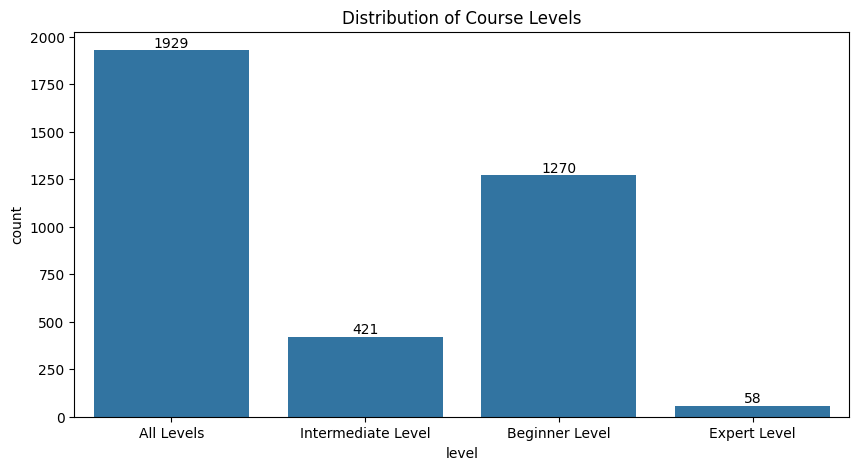

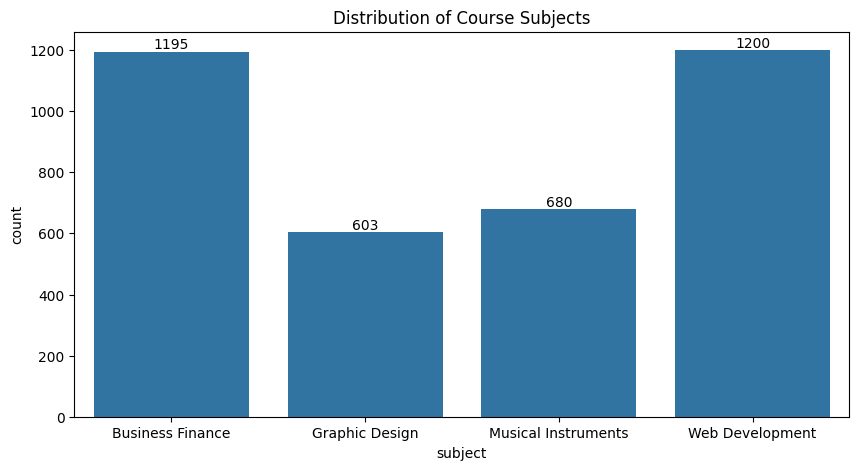

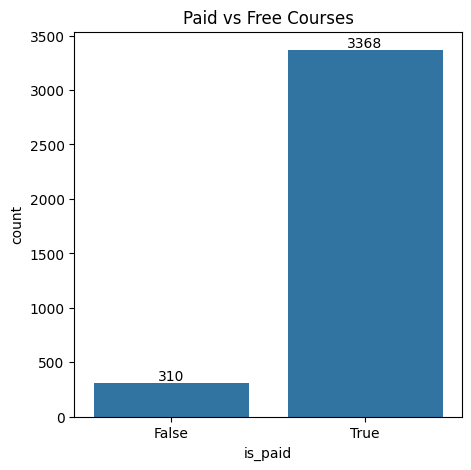

In [14]:
# Distribution of Categorical variables like 'level', 'subject', and 'is_paid'

plt.figure(figsize = (10, 5))
ax1 = sns.countplot(data = udemy_data, x = 'level')
plt.title('Distribution of Course Levels')

# Annotate bars with values
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'bottom')
plt.show()

plt.figure(figsize = (10, 5))
ax2 = sns.countplot(data = udemy_data, x = 'subject')
plt.title('Distribution of Course Subjects')

# Annotate bars with values
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'bottom')
plt.show()

plt.figure(figsize = (5, 5))
ax3 = sns.countplot(data = udemy_data, x = 'is_paid')
plt.title('Paid vs Free Courses')

# Annotate bars with values
for p in ax3.patches:
    ax3.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'bottom')
plt.show()

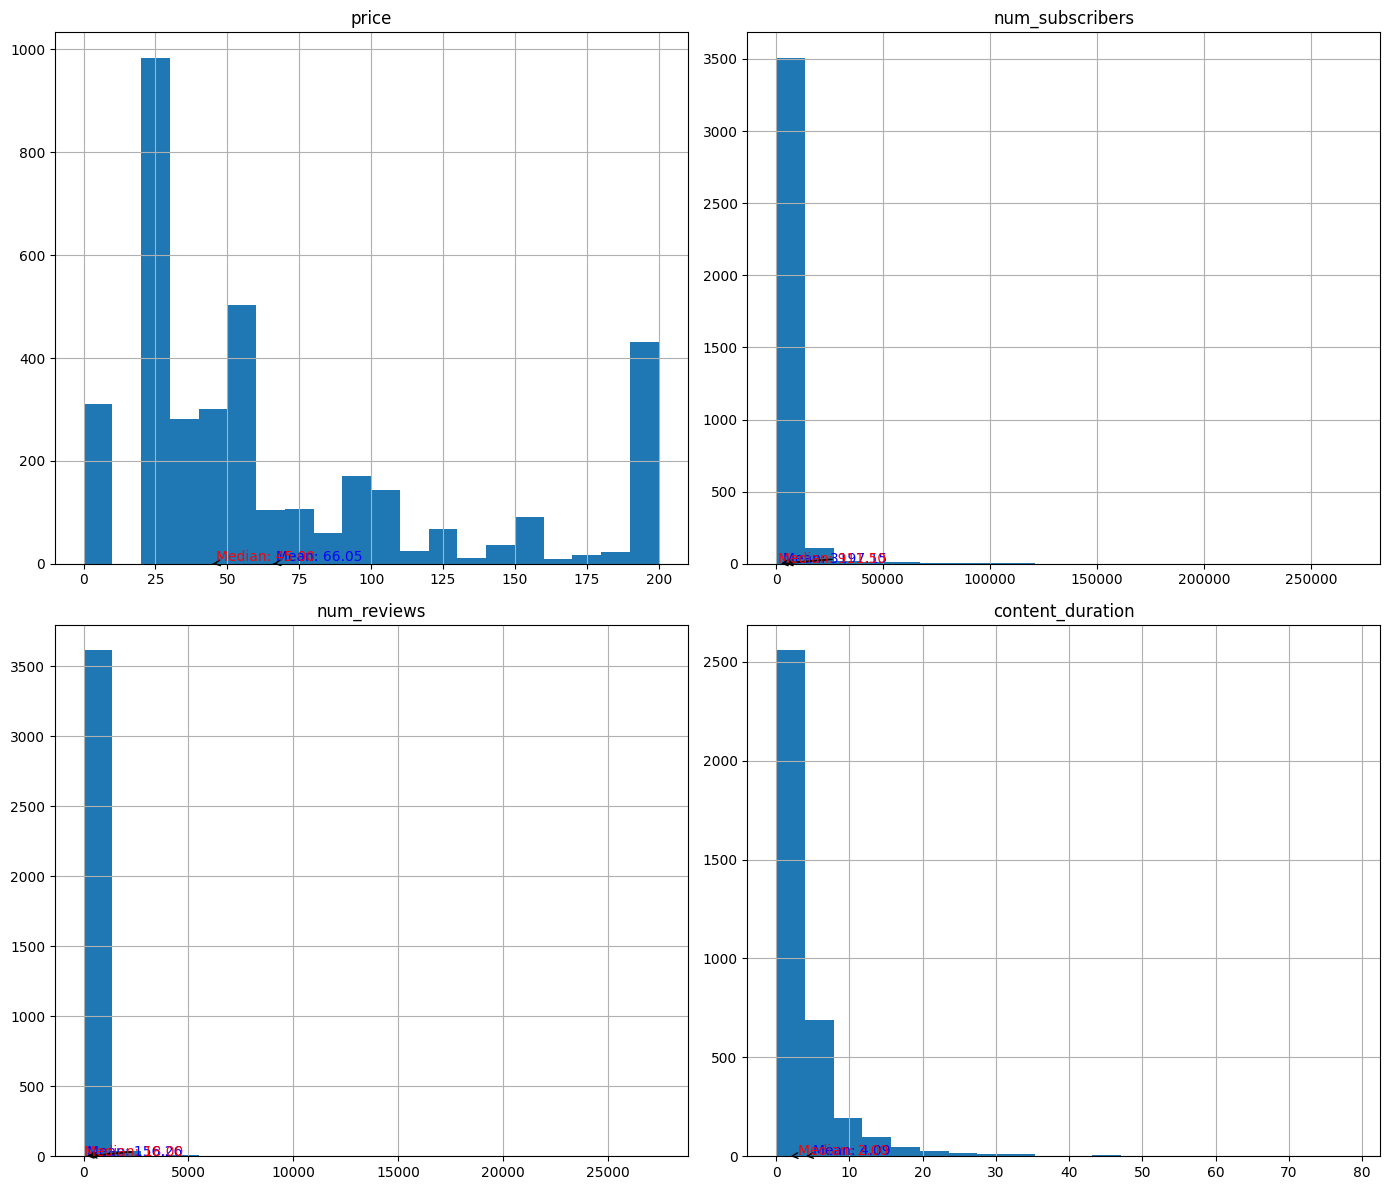

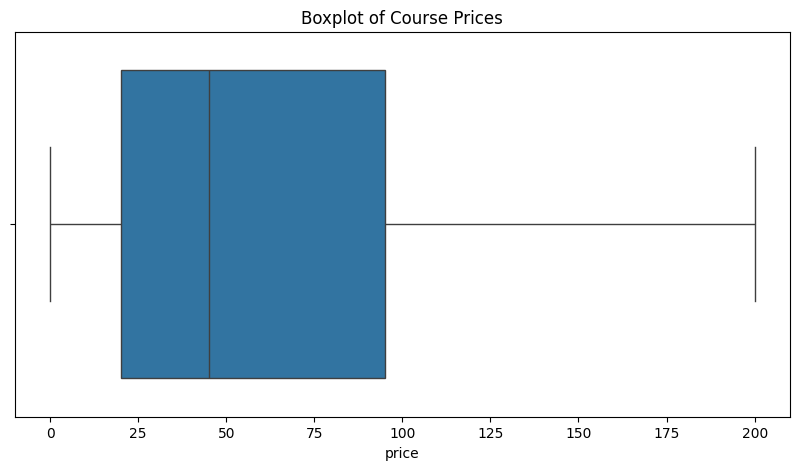

In [15]:
# Define the numeric variables for histograms
numeric_vars = ['price', 'num_subscribers', 'num_reviews', 'content_duration']

# Visualizing numeric variable distribution using histograms
axes = udemy_data[numeric_vars].hist(bins = 20, figsize = (14, 12))

# Annotate each histogram
for ax, var in zip(axes.flatten(), numeric_vars):
    # Calculate mean and median
    mean = udemy_data[var].mean()
    median = udemy_data[var].median()

    # Annotate mean
    ax.annotate(f'Mean: {mean:.2f}', xy = (mean, 0), 
                xytext = (mean + 1, 5), 
                arrowprops = dict(facecolor = 'black', arrowstyle = '->'),
                fontsize = 10, color = 'blue')
    
     # Annotate median
    ax.annotate(f'Median: {median:.2f}', xy = (median, 0), 
                xytext = (median + 1, 5), 
                arrowprops = dict(facecolor = 'red', arrowstyle = '->'),
                fontsize = 10, color = 'red')

plt.tight_layout()    
plt.show()

# Boxplot to check for outliers
plt.figure(figsize = (10, 5))
sns.boxplot(data = udemy_data, x = 'price')
plt.title('Boxplot of Course Prices')

# Annotate the median
median = udemy_data['price'].median()
ax.annotate(f'Median: {median:.2f}', xy = (0, median), 
            xytext = (0.1, median + 5), 
            arrowprops = dict(facecolor = 'red', arrowstyle = '->'),
            fontsize = 10, color = 'red')

plt.show()

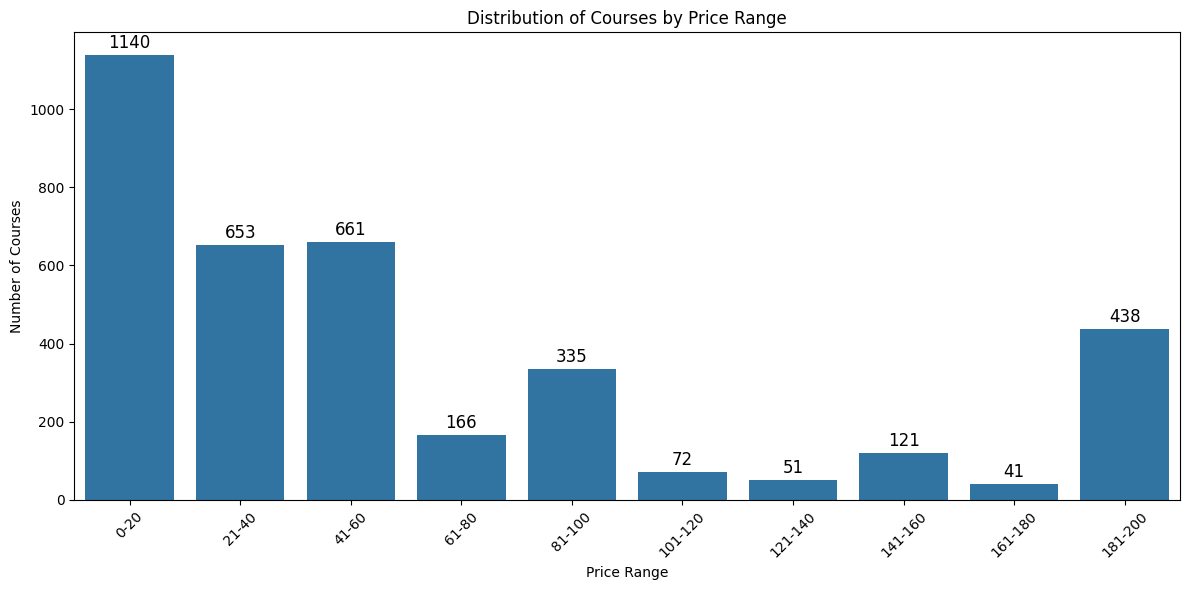

In [16]:
# Distribution of courses based on price range

plt.figure(figsize = (12, 6))  
ax = sns.countplot(data=udemy_data, x='price_range')

# Add annotations to each bar
for p in ax.patches:  # Loop through each bar in the plot
    ax.annotate(f'{int(p.get_height())}',  # The text to annotate (the height of the bar)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
                ha = 'center',  
                va = 'baseline', 
                xytext = (0, 5), 
                textcoords = 'offset points', fontsize = 12, color = 'black')

plt.title('Distribution of Courses by Price Range')  
plt.xlabel('Price Range')  
plt.ylabel('Number of Courses')  
plt.xticks(rotation = 45) 
plt.tight_layout()  
plt.show()  

C:\Users\HP\AppData\Local\Temp\ipykernel_7212\2786396614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = udemy_data, x = 'published_year', palette = 'coolwarm')  # Create the count plot and store the axes


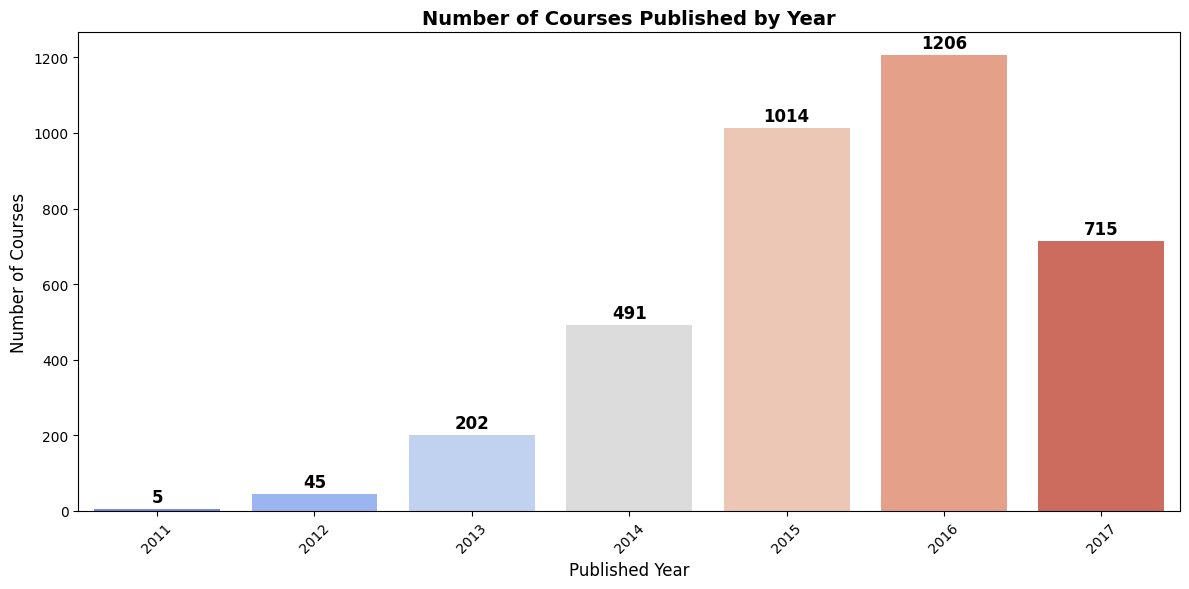

In [17]:
# Number of Courses Published by Year

# Extract year from 'published_date'
udemy_data['published_date'] = pd.to_datetime(udemy_data['published_date'], errors = 'coerce')
udemy_data['published_year'] = udemy_data['published_date'].dt.year

# Create the countplot for the distribution of courses by published year
plt.figure(figsize = (12, 6)) 
ax = sns.countplot(data = udemy_data, x = 'published_year', palette = 'coolwarm')  # Create the count plot and store the axes

# Annotate each bar with the count of courses
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', 
                xytext = (0, 5), textcoords = 'offset points',  # Offset the text slightly above the bar
                fontsize = 12, color = 'black', weight = 'bold')  # Set font size, color, and weight for readability

# Add titles and labels
plt.title('Number of Courses Published by Year', fontsize = 14, weight = 'bold')  
plt.xlabel('Published Year', fontsize = 12) 
plt.ylabel('Number of Courses', fontsize = 12)
plt.xticks(rotation = 45) 
plt.tight_layout() 
plt.show() 

##### 2.3.3 Bivariate Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_7212\3711323589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = udemy_data, x = 'level', y = 'price', palette = 'Set2')


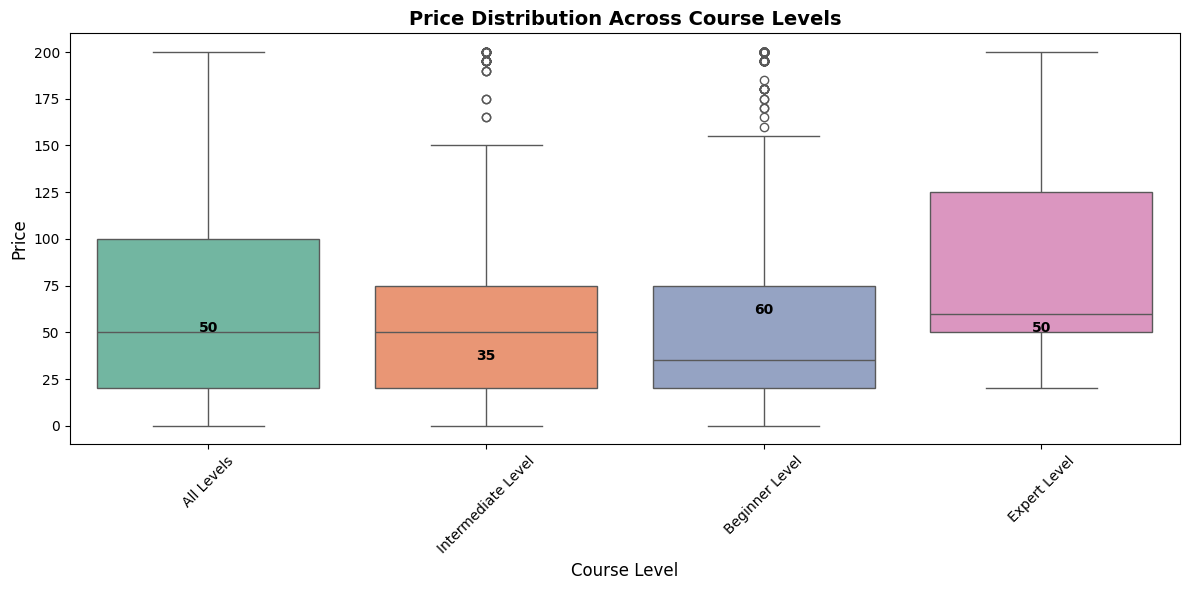

In [18]:
# Boxplot of price by course level
plt.figure(figsize = (12, 6))
ax = sns.boxplot(data = udemy_data, x = 'level', y = 'price', palette = 'Set2')

# Annotating the median of each level
medians = udemy_data.groupby(['level'])['price'].median()  # Calculate the median price for each level
for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.0f}', horizontalalignment = 'center', size = 'medium', color = 'black', weight = 'semibold')

# Set plot title and labels
plt.title('Price Distribution Across Course Levels', fontsize = 14, weight = 'bold')
plt.xlabel('Course Level', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed for readability
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7212\475757602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = udemy_data, x = 'subject', y = 'price', palette = 'Set3')


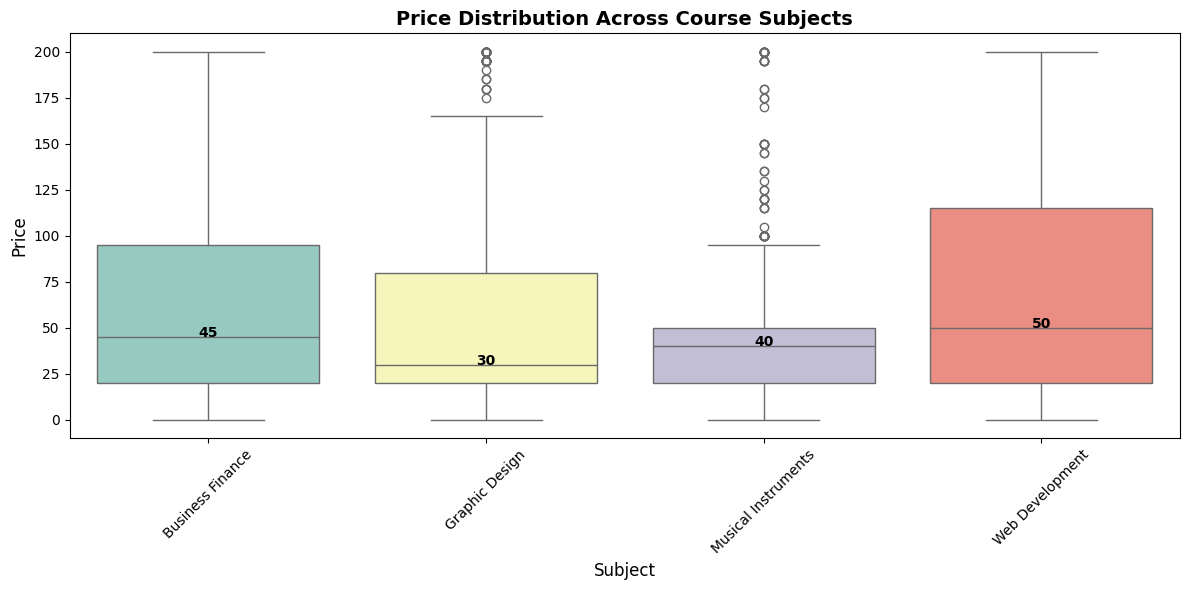

In [19]:
# Boxplot of price by subject
plt.figure(figsize = (12, 6))
ax = sns.boxplot(data = udemy_data, x = 'subject', y = 'price', palette = 'Set3')

# Annotating the median of each subject
medians = udemy_data.groupby(['subject'])['price'].median()  # Calculate the median price for each subject
for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.0f}', horizontalalignment = 'center', size = 'medium', color = 'black', weight = 'semibold')

# Set plot title and labels
plt.title('Price Distribution Across Course Subjects', fontsize = 14, weight = 'bold')
plt.xlabel('Subject', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed for readability
plt.tight_layout()
plt.show()

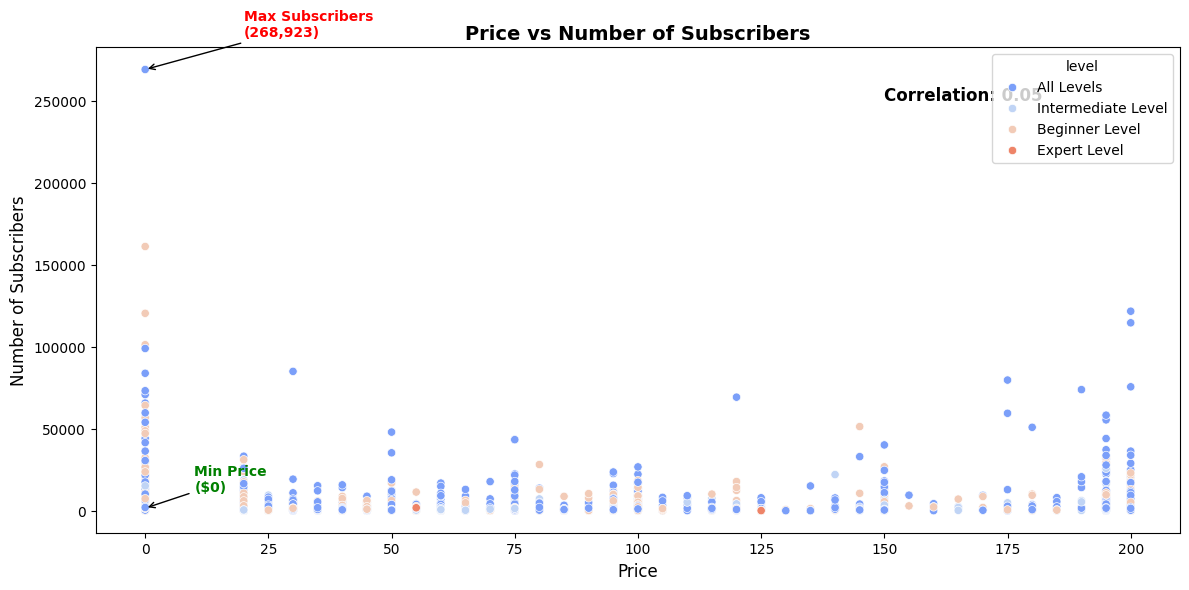

Correlation between Price and Number of Subscribers: 0.05


In [20]:
# Scatter plot for price vs. number of subscribers
plt.figure(figsize = (12, 6))
ax = sns.scatterplot(data = udemy_data, x = 'price', y = 'num_subscribers', hue = 'level', palette = 'coolwarm')

# Add the title and axis labels
plt.title('Price vs Number of Subscribers', fontsize = 14, weight = 'bold')
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Number of Subscribers', fontsize = 12)

# Annotate with the correlation value
correlation = udemy_data['price'].corr(udemy_data['num_subscribers'])
plt.text(0.8, 0.9, f'Correlation: {correlation:.2f}', ha = 'center', va = 'center', transform = ax.transAxes, fontsize = 12, weight = 'semibold', color = 'black')

# Annotate the highest point (most subscribers)
max_subs = udemy_data.loc[udemy_data['num_subscribers'].idxmax()]  # Get the row with the max subscribers
plt.annotate(f"Max Subscribers\n({max_subs['num_subscribers']:,})",
             xy = (max_subs['price'], max_subs['num_subscribers']),
             xytext = (max_subs['price']+20, max_subs['num_subscribers']+20000),  # Offset annotation
             arrowprops = dict(facecolor = 'black', arrowstyle = "->"),
             fontsize = 10, weight = 'bold', color = 'red')

# Annotate the lowest point (min price)
min_price = udemy_data.loc[udemy_data['price'].idxmin()]  # Get the row with the minimum price
plt.annotate(f"Min Price\n(${min_price['price']})",
             xy = (min_price['price'], min_price['num_subscribers']),
             xytext = (min_price['price']+10, min_price['num_subscribers']+10000),  # Offset annotation
             arrowprops = dict(facecolor = 'black', arrowstyle = "->"),
             fontsize = 10, weight = 'bold', color = 'green')

# Show the plot
plt.tight_layout()
plt.show()

# Print the correlation value
print(f"Correlation between Price and Number of Subscribers: {correlation:.2f}")

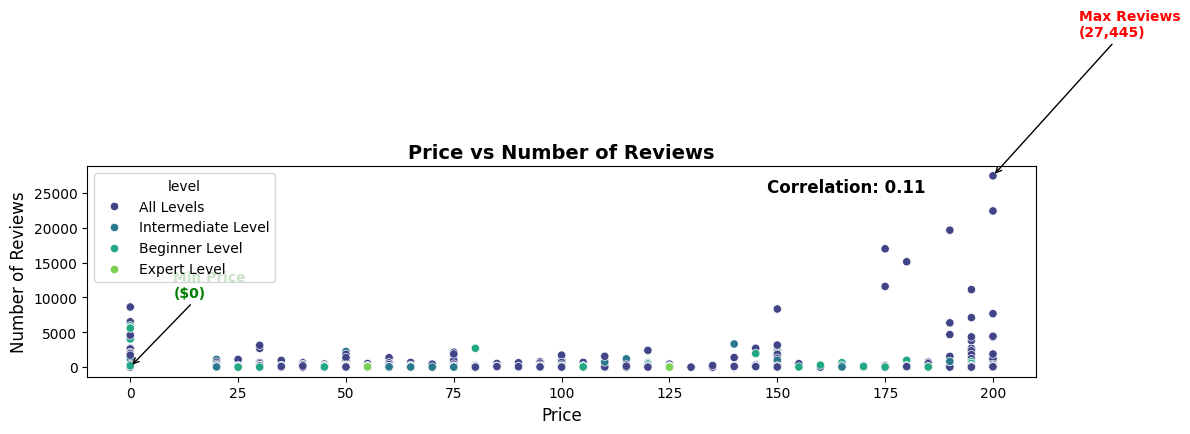

Correlation between Price and Number of Reviews: 0.11


In [21]:
# Scatter plot for price vs. number of reviewa
plt.figure(figsize = (12, 6))
ax = sns.scatterplot(data = udemy_data, x = 'price', y = 'num_reviews', hue = 'level', palette = 'viridis')

# Add the title and axis labels
plt.title('Price vs Number of Reviews', fontsize = 14, weight = 'bold')
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Number of Reviews', fontsize = 12)

# Annotate with the correlation value
correlation = udemy_data['price'].corr(udemy_data['num_reviews'])
plt.text(0.8, 0.9, f'Correlation: {correlation:.2f}', ha = 'center', va = 'center', transform = ax.transAxes, fontsize = 12, weight = 'semibold', color = 'black')

# Annotate the highest point (most subscribers)
max_subs = udemy_data.loc[udemy_data['num_reviews'].idxmax()]  # Get the row with the max subscribers
plt.annotate(f"Max Reviews\n({max_subs['num_reviews']:,})",
             xy = (max_subs['price'], max_subs['num_reviews']),
             xytext = (max_subs['price']+20, max_subs['num_reviews']+20000),  # Offset annotation
             arrowprops = dict(facecolor = 'black', arrowstyle = "->"),
             fontsize = 10, weight = 'bold', color = 'red')

# Annotate the lowest point (min price)
min_price = udemy_data.loc[udemy_data['price'].idxmin()]  # Get the row with the minimum price
plt.annotate(f"Min Price\n(${min_price['price']})",
             xy = (min_price['price'], min_price['num_reviews']),
             xytext = (min_price['price']+10, min_price['num_reviews']+10000),  # Offset annotation
             arrowprops = dict(facecolor = 'black', arrowstyle = "->"),
             fontsize = 10, weight = 'bold', color = 'green')

# Show the plot
plt.tight_layout()
plt.show()

# Print the correlation value
print(f"Correlation between Price and Number of Reviews: {correlation:.2f}")

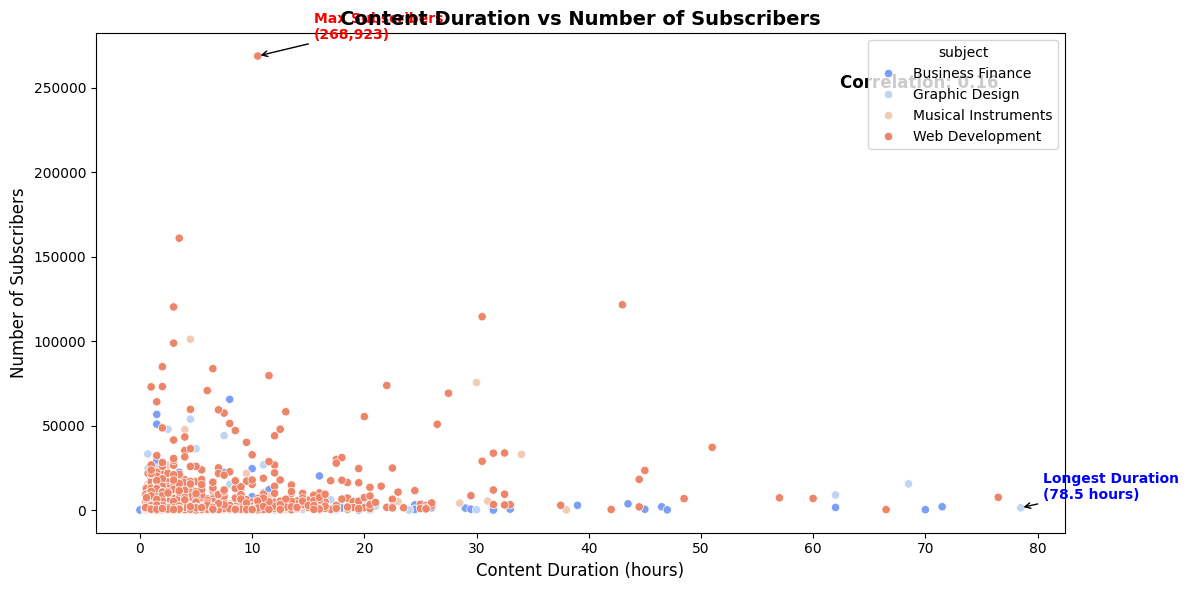

Correlation between Content Duration and Number of Subscribers: 0.16


In [22]:
# Relationship Between Course Duration and Number of Subscribers

# Scatter plot for content duration vs. number of subscribers
plt.figure(figsize = (12, 6))
ax = sns.scatterplot(data = udemy_data, x = 'content_duration', y = 'num_subscribers', hue = 'subject', palette = 'coolwarm')

# Set plot title and labels
plt.title('Content Duration vs Number of Subscribers', fontsize = 14, weight = 'bold')
plt.xlabel('Content Duration (hours)', fontsize = 12)
plt.ylabel('Number of Subscribers', fontsize = 12)

# Annotate with the correlation value
correlation = udemy_data['content_duration'].corr(udemy_data['num_subscribers'])
plt.text(0.85, 0.9, f'Correlation: {correlation:.2f}', ha = 'center', va = 'center', transform = ax.transAxes, fontsize = 12, weight = 'semibold', color = 'black')

# Annotate the point with the max subscribers
max_subs = udemy_data.loc[udemy_data['num_subscribers'].idxmax()]  # Get the row with the max subscribers
plt.annotate(f"Max Subscribers\n({max_subs['num_subscribers']:,})",
             xy = (max_subs['content_duration'], max_subs['num_subscribers']),
             xytext = (max_subs['content_duration']+5, max_subs['num_subscribers']+10000),  # Offset the annotation
             arrowprops = dict(facecolor = 'black', arrowstyle = "->"),
             fontsize = 10, weight = 'bold', color = 'red')

# Annotate the course with the longest content duration
max_duration = udemy_data.loc[udemy_data['content_duration'].idxmax()]  # Get the row with the max content duration
plt.annotate(f"Longest Duration\n({max_duration['content_duration']} hours)",
             xy = (max_duration['content_duration'], max_duration['num_subscribers']),
             xytext = (max_duration['content_duration']+2, max_duration['num_subscribers']+5000),  # Offset the annotation
             arrowprops = dict(facecolor = 'black', arrowstyle = "->"),
             fontsize = 10, weight = 'bold', color = 'blue')

# Display the plot
plt.tight_layout()
plt.show()

# Print the correlation between content duration and number of subscribers
print(f"Correlation between Content Duration and Number of Subscribers: {correlation:.2f}")

C:\Users\HP\AppData\Local\Temp\ipykernel_7212\2696243822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data = udemy_data, x = 'published_year', y = 'num_subscribers', palette = 'Set2')


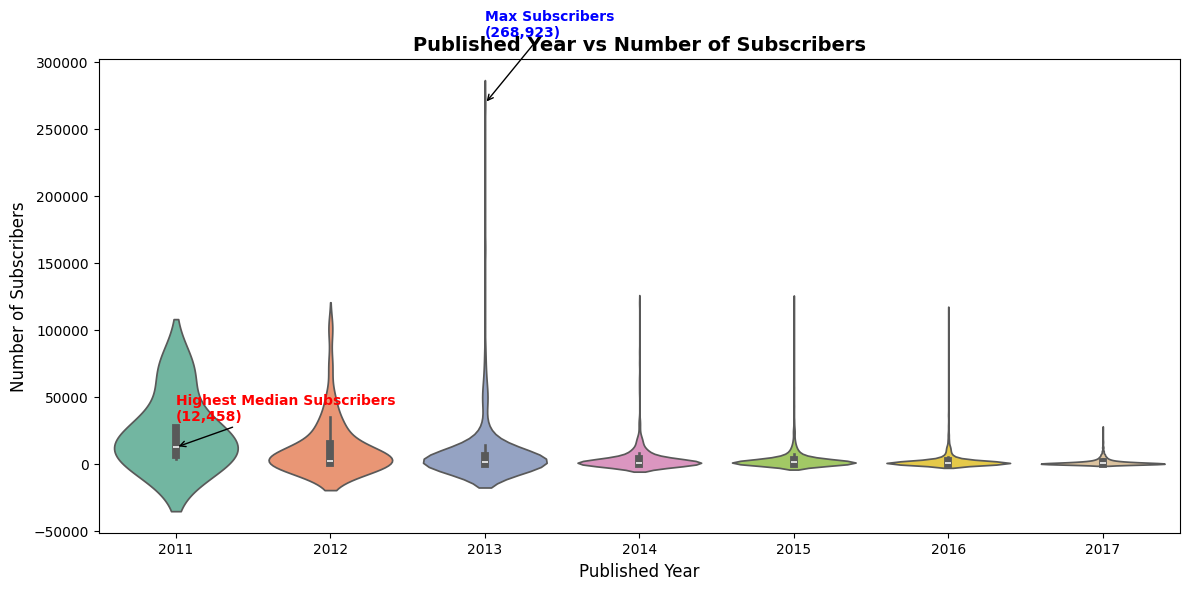

In [23]:
# Violin plot for published year vs. number of subscribers
plt.figure(figsize = (12, 6))
ax = sns.violinplot(data = udemy_data, x = 'published_year', y = 'num_subscribers', palette = 'Set2')

# Set the plot title and labels
plt.title('Published Year vs Number of Subscribers', fontsize = 14, weight = 'bold')
plt.xlabel('Published Year', fontsize = 12)
plt.ylabel('Number of Subscribers', fontsize = 12)

# Annotate the year with the highest median number of subscribers
median_subscribers_by_year = udemy_data.groupby('published_year')['num_subscribers'].median()
max_median_year = median_subscribers_by_year.idxmax()  # Year with the highest median
max_median_value = median_subscribers_by_year.max()  # Value of the highest median

plt.annotate(f"Highest Median Subscribers\n({int(max_median_value):,})",
             xy = (max_median_year-udemy_data['published_year'].min(), max_median_value),
             xytext = (max_median_year-udemy_data['published_year'].min(), max_median_value + 20000),
             arrowprops = dict(facecolor = 'black', arrowstyle = "->"),
             fontsize = 10, weight = 'bold', color = 'red')

# Annotate the year with the highest number of subscribers
max_subs = udemy_data.loc[udemy_data['num_subscribers'].idxmax()]
plt.annotate(f"Max Subscribers\n({max_subs['num_subscribers']:,})",
             xy = (max_subs['published_year'] - udemy_data['published_year'].min(), max_subs['num_subscribers']),
             xytext = (max_subs['published_year'] - udemy_data['published_year'].min(), max_subs['num_subscribers'] + 50000),
             arrowprops = dict(facecolor = 'black', arrowstyle = "->"),
             fontsize = 10, weight = 'bold', color = 'blue')

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7212\552350973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(data = udemy_data, x = 'level', y = 'num_lectures', jitter = True, palette = 'husl', dodge = True, marker = 'o')


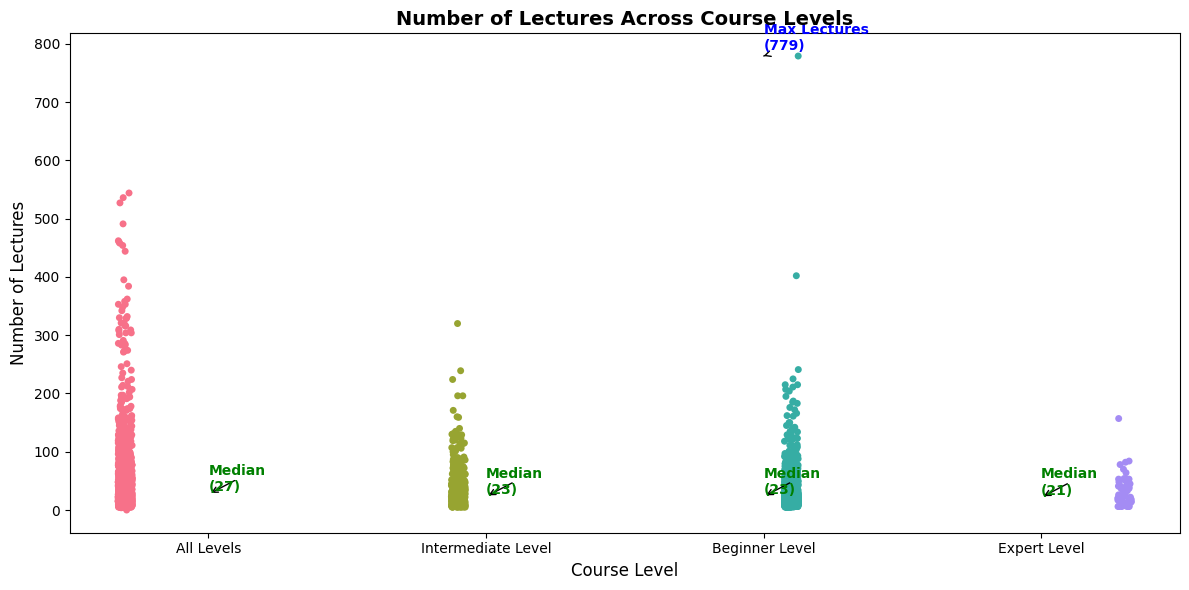

In [24]:
# Strip plot of number of lectures by course level
plt.figure(figsize = (12, 6))
ax = sns.stripplot(data = udemy_data, x = 'level', y = 'num_lectures', jitter = True, palette = 'husl', dodge = True, marker = 'o')

# Set plot title and labels
plt.title('Number of Lectures Across Course Levels', fontsize = 14, weight = 'bold')
plt.xlabel('Course Level', fontsize = 12)
plt.ylabel('Number of Lectures', fontsize = 12)

# Annotate the course level with the highest number of lectures
max_lectures = udemy_data.loc[udemy_data['num_lectures'].idxmax()]  # Get the row with the highest number of lectures
plt.annotate(f"Max Lectures\n({max_lectures['num_lectures']})",
             xy = (max_lectures['level'], max_lectures['num_lectures']),
             xytext = (max_lectures['level'], max_lectures['num_lectures'] + 10),
             arrowprops = dict(facecolor = 'black', arrowstyle = "->"),
             fontsize = 10, weight = 'bold', color = 'blue')

# Highlight the median number of lectures for each course level
medians = udemy_data.groupby('level')['num_lectures'].median()
for level, median in medians.items():
    plt.annotate(f"Median\n({int(median)})",
                 xy = (level, median),
                 xytext = (level, median + 5),
                 arrowprops = dict(facecolor = 'green', arrowstyle = "->"),
                 fontsize = 10, weight = 'bold', color = 'green')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7212\1603160628.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = avg_subscribers, x = 'is_paid', y = 'num_subscribers', palette = 'viridis')


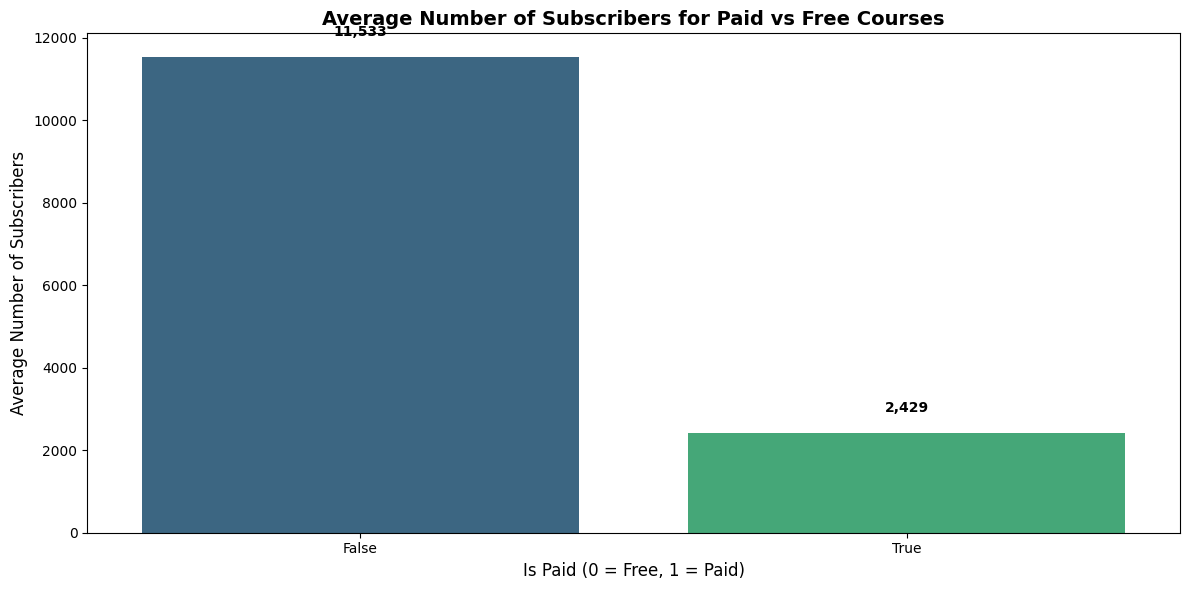

In [25]:
# Calculate the average number of subscribers for paid and free courses
avg_subscribers = udemy_data.groupby('is_paid')['num_subscribers'].mean().reset_index()

# Bar plot for average number of subscribers for paid vs free courses
plt.figure(figsize = (12, 6))
ax = sns.barplot(data = avg_subscribers, x = 'is_paid', y = 'num_subscribers', palette = 'viridis')

# Set plot title and labels
plt.title('Average Number of Subscribers for Paid vs Free Courses', fontsize = 14, weight = 'bold')
plt.xlabel('Is Paid (0 = Free, 1 = Paid)', fontsize = 12)
plt.ylabel('Average Number of Subscribers', fontsize = 12)

# Annotate each bar with the exact average number of subscribers
for index, row in avg_subscribers.iterrows():
    plt.text(index, row['num_subscribers'] + 500, f"{int(row['num_subscribers']):,}", 
             color = 'black', ha = "center", fontsize = 10, weight = 'bold')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7212\839952437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = total_reviews, x = 'subject', y = 'num_reviews', palette = 'cubehelix')


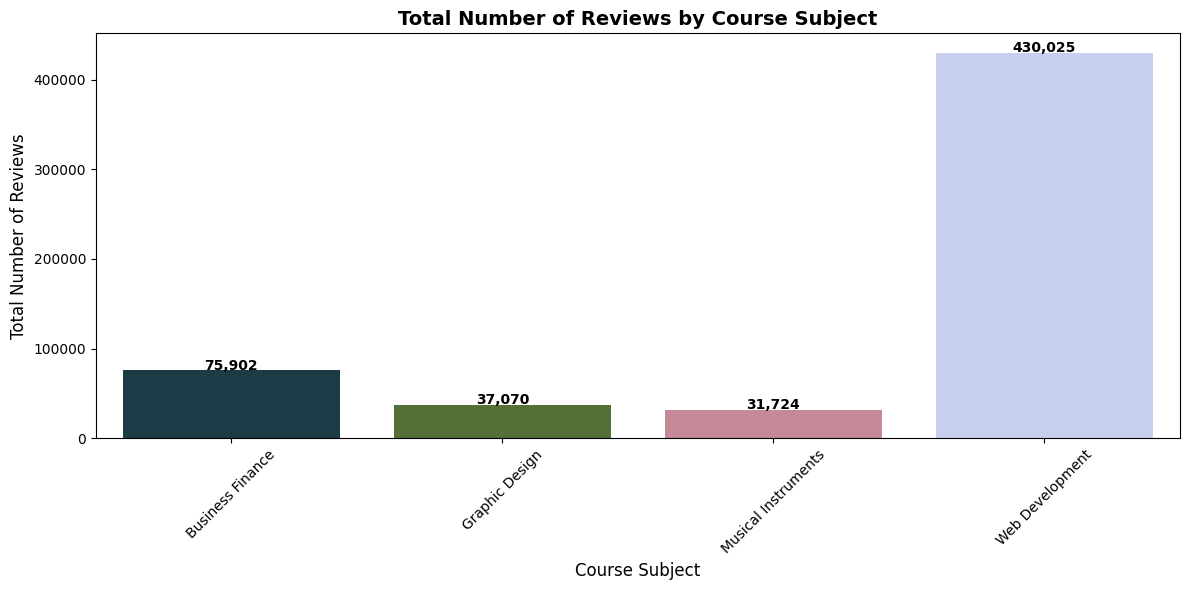

In [26]:
# Calculate the total number of reviews for each course subject
total_reviews = udemy_data.groupby('subject')['num_reviews'].sum().reset_index()

# Create a column chart (bar plot) for the total number of reviews by course subject
plt.figure(figsize = (12, 6))
ax = sns.barplot(data = total_reviews, x = 'subject', y = 'num_reviews', palette = 'cubehelix')

# Set plot title and labels
plt.title('Total Number of Reviews by Course Subject', fontsize = 14, weight = 'bold')
plt.xlabel('Course Subject', fontsize = 12)
plt.ylabel('Total Number of Reviews', fontsize = 12)
plt.xticks(rotation = 45)

# Annotate each bar with the total number of reviews
for index, row in total_reviews.iterrows():
    plt.text(index, row['num_reviews'] + 500, f"{int(row['num_reviews']):,}", 
             color = 'black', ha = "center", fontsize = 10, weight = 'bold')

# Display the plot
plt.tight_layout()
plt.show()

##### 2.3.4 Multivariate Analysis

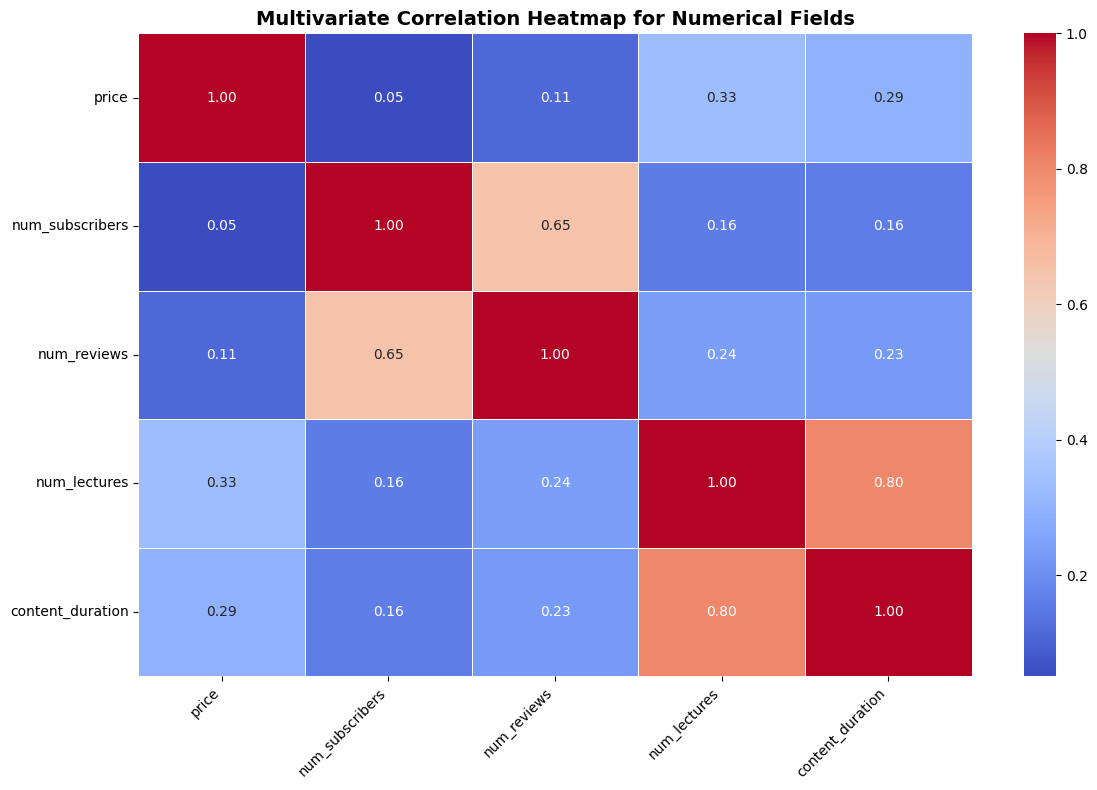

In [27]:
# Correlation matrix for numeric columns
corr_matrix = udemy_data[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']].corr()

# Heatmap to visualize correlations
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, fmt = ".2f", annot_kws = {"size": 10})

# Set title and labels
plt.title('Multivariate Correlation Heatmap for Numerical Fields', fontsize = 14, weight = 'bold')
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 0)
plt.tight_layout()

# Display the heatmap
plt.show()

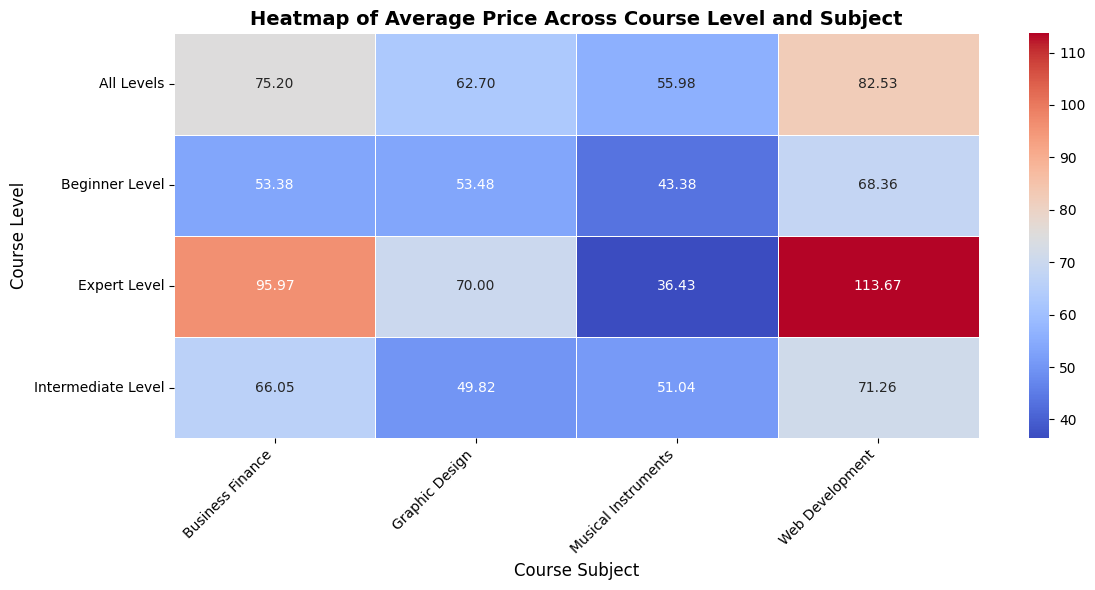

In [28]:
# Create a pivot table for course level and subject with the average price
pivot_table = pd.pivot_table(udemy_data, values = 'price', index = 'level', columns = 'subject', aggfunc = 'mean')

# Heatmap of average price across course level and subject
plt.figure(figsize = (12, 6))
sns.heatmap(pivot_table, annot = True, cmap = 'coolwarm', linewidths = 0.5, fmt = ".2f", annot_kws = {"size": 10})

# Set title and labels
plt.title('Heatmap of Average Price Across Course Level and Subject', fontsize = 14, weight = 'bold')
plt.xlabel('Course Subject', fontsize = 12)
plt.ylabel('Course Level', fontsize = 12)

# Rotate x-axis labels for better readability
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 0)
plt.tight_layout()

# Display the heatmap
plt.show()

##### 2.3.5 Hypothesis Testing

In [29]:
# Extract the relevant columns
price = udemy_data['price']
num_subscribers = udemy_data['num_subscribers']

# Perform Pearson's correlation test
correlation_coefficient, p_value = stats.pearsonr(price, num_subscribers)

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the Null Hypothesis (H0): There is a significant relationship between the price of a course and the number of subscribers.")
else:
    print("Fail to Reject the Null Hypothesis (H0): There is no significant relationship between the price of a course and the number of subscribers.")

Pearson Correlation Coefficient: 0.05076934882586655
P-value: 0.0020705358279145157
Reject the Null Hypothesis (H0): There is a significant relationship between the price of a course and the number of subscribers.


##### 2.3.6 Analytical Business Questions

2. Does a higher price correlate with more course reviews or better engagement?

3. Which subject areas attract the most subscribers?

4. How does the level of a course (beginner, intermediate, advanced) impact the number of subscribers?

5. Is there a trend in the number of courses published over time?

6. What is the average content duration for courses in each subject?

7. Are courses with more lectures more successful (i.e., more subscribers)?

8. What is the distribution of course prices across different subjects?

9. How do the number of reviews impact course enrollment (subscribers)?

10. Do courses published earlier perform better than recently published courses?

###### 1. What is the average number of subscribers for free versus paid courses?

In [30]:
# Group by 'is_paid' and calculate the average number of subscribers
avg_subscribers = udemy_data.groupby('is_paid')['num_subscribers'].mean().reset_index()

# Rename the 'is_paid' column for better understanding
avg_subscribers['is_paid'] = avg_subscribers['is_paid'].map({0: 'Free', 1: 'Paid'})

# Print the result
print(avg_subscribers)

  is_paid  num_subscribers
0     NaN     11533.951613
1     NaN      2429.808492


C:\Users\HP\AppData\Local\Temp\ipykernel_7212\878514017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'is_paid', y = 'num_subscribers', data = udemy_data, palette = 'coolwarm')


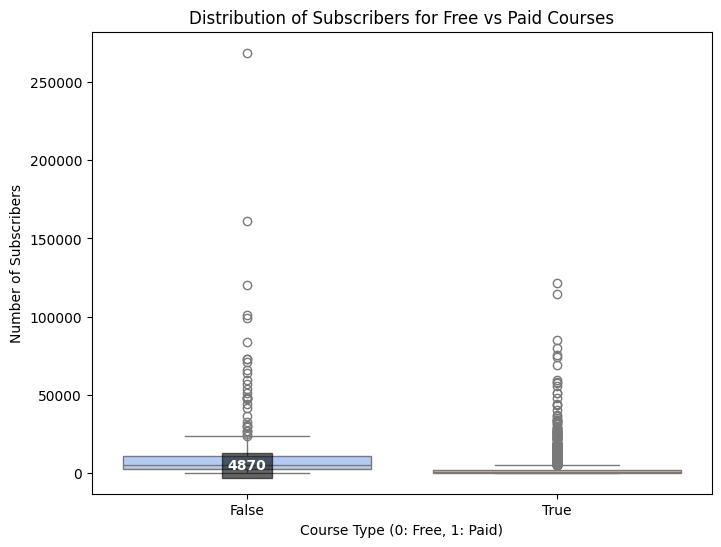

In [33]:
# Boxplot to visualize distribution of subscribers for free vs paid courses
plt.figure(figsize = (8, 6))
ax = sns.boxplot(x = 'is_paid', y = 'num_subscribers', data = udemy_data, palette = 'coolwarm')

# Add titles and labels
plt.title('Distribution of Subscribers for Free vs Paid Courses')
plt.xlabel('Course Type (0: Free, 1: Paid)')
plt.ylabel('Number of Subscribers')

# Annotating the median value on the boxplot
for i in range(len(ax.patches)//2):
    median_val = udemy_data.groupby('is_paid')['num_subscribers'].median().iloc[i]
    ax.text(i, median_val, f'{median_val:.0f}', ha = 'center', va = 'center', fontweight = 'bold', color = 'white', size = 10, bbox = dict(facecolor = 'black', alpha = 0.6))

# Display the plot
plt.show()